In [1]:
import pandas as pd

# Generate the "true" data with known relationships
observDF = pd.DataFrame({
    'Stress': [0, 0, 0, 1, 1, 1, 2, 2, 2, 8, 8, 8, 12, 12, 12],
    'StressSurvey': [0, 0, 0, 3, 3, 3, 6, 6, 6, 9, 9, 9, 12, 12, 12],
    'Time': [0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2.1, 2.2, 2.2, 2.2],
    'Anxiety': [0, 0.1, 0.1, 1.1, 1.1, 1.1, 2.2, 2.2, 2.2, 8.2, 8.2, 8.21, 12.22, 12.22, 12.22]
})
observDF

,Stress,StressSurvey,Time,Anxiety
0,0,0,0.0,0.00
1,0,0,1.0,0.10
2,0,0,1.0,0.10
3,1,3,1.0,1.10
4,1,3,1.0,1.10
5,1,3,1.0,1.10
6,2,6,2.0,2.20
7,2,6,2.0,2.20
8,2,6,2.0,2.20
9,8,9,2.0,8.20


In [2]:
import pandas as pd
import statsmodels.api as sm

# Load the data
#observDF = pd.read_csv("data.csv")

# Define independent and dependent variables
X = observDF["StressSurvey"]
y = observDF["Anxiety"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Extract coefficients
intercept = model.params["const"]
slope = model.params["StressSurvey"]

print(f"Intercept: {intercept:.4f}")
print(f"Slope: {slope:.4f}")

                            OLS Regression Results                            
Dep. Variable:                Anxiety   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     118.4
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           6.68e-08
Time:                        07:08:46   Log-Likelihood:                -27.079
No. Observations:                  15   AIC:                             58.16
Df Residuals:                      13   BIC:                             59.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.5240      0.707     -2.156   

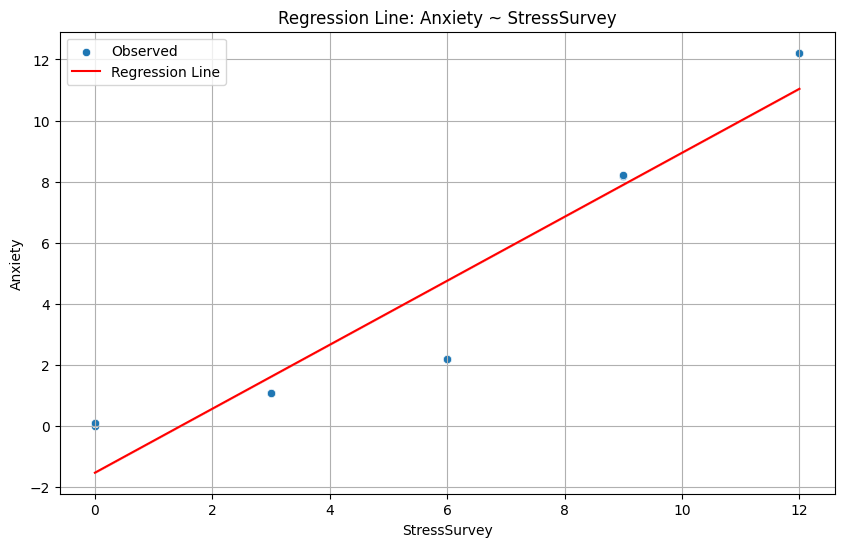

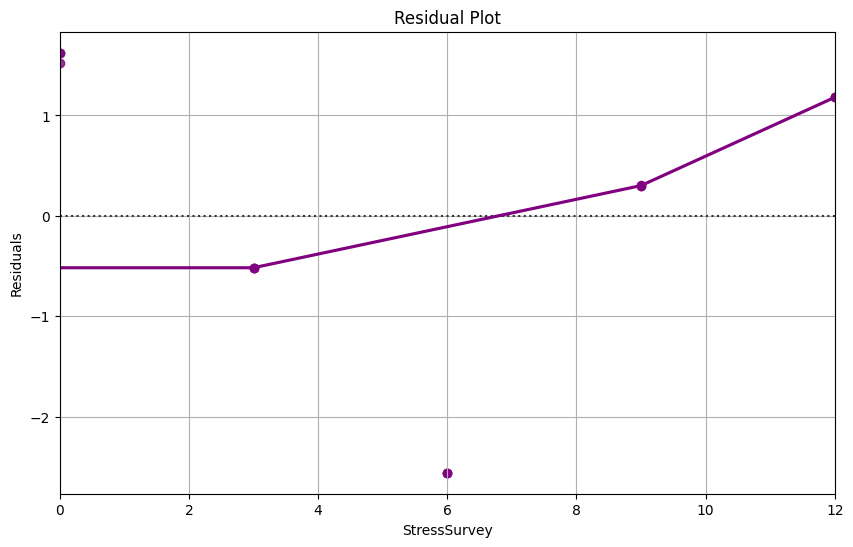

R-squared: 0.9011


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract predictions and residuals
observDF["Predicted_Anxiety"] = model.predict(X)
observDF["Residuals"] = observDF["Anxiety"] - observDF["Predicted_Anxiety"]

# Plot regression line over data points
plt.figure(figsize=(10, 6))
sns.scatterplot(x="StressSurvey", y="Anxiety", data=observDF, label="Observed")
sns.lineplot(x="StressSurvey", y="Predicted_Anxiety", data=observDF, color="red", label="Regression Line")
plt.title("Regression Line: Anxiety ~ StressSurvey")
plt.xlabel("StressSurvey")
plt.ylabel("Anxiety")
plt.legend()
plt.grid(True)
plt.show()

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x="StressSurvey", y="Anxiety", data=observDF, lowess=True, color="purple")
plt.title("Residual Plot")
plt.xlabel("StressSurvey")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Print R-squared
print(f"R-squared: {model.rsquared:.4f}")


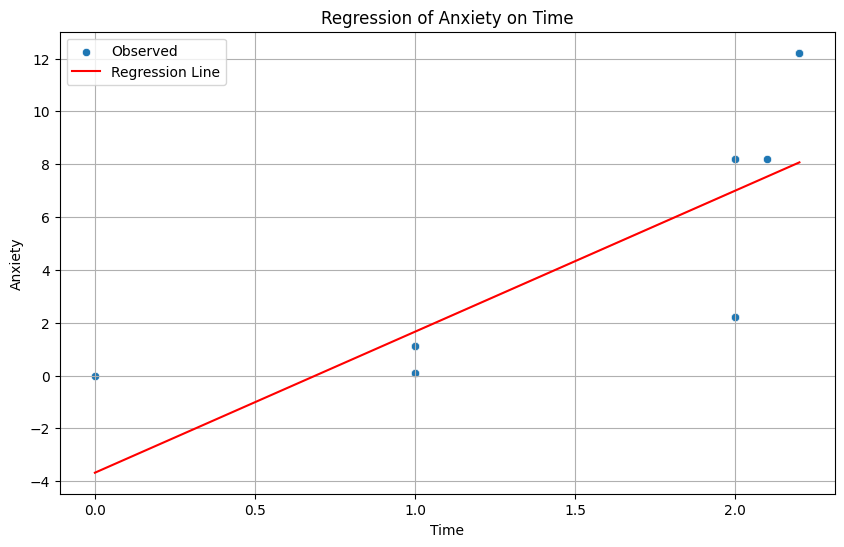

Estimated Intercept: -3.6801
Estimated Slope: 5.3406


In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
observDF = pd.read_csv("data.csv")

# Define independent and dependent variables
X = observDF["Time"]
y = observDF["Anxiety"]

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X_const).fit()

# Extract coefficients
intercept = model.params["const"]
slope = model.params["Time"]

# Create predictions for plotting
observDF["Predicted_Anxiety"] = model.predict(X_const)

# Plot scatter and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Time", y="Anxiety", data=observDF, label="Observed")
sns.lineplot(x="Time", y="Predicted_Anxiety", data=observDF, color="red", label="Regression Line")
plt.title("Regression of Anxiety on Time")
plt.xlabel("Time")
plt.ylabel("Anxiety")
plt.legend()
plt.grid(True)
plt.show()

# Print coefficients
print(f"Estimated Intercept: {intercept:.4f}")
print(f"Estimated Slope: {slope:.4f}")

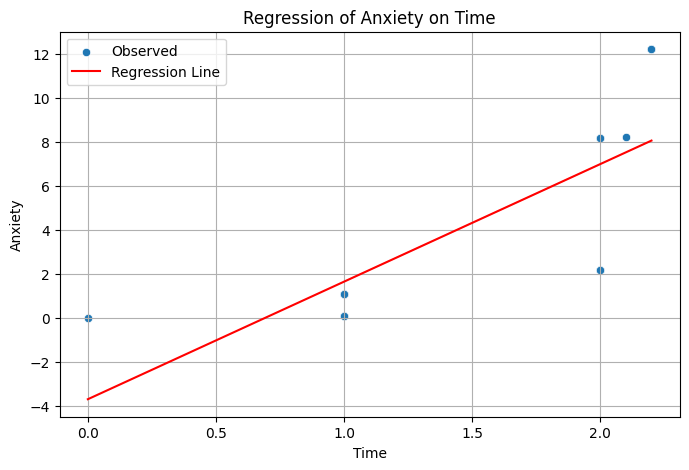

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create predictions for plotting
observDF["Predicted_Anxiety"] = model.predict(X_const)

# Plot scatter and regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Time", y="Anxiety", data=observDF, label="Observed")
sns.lineplot(x="Time", y="Predicted_Anxiety", data=observDF, color="red", label="Regression Line")
plt.title("Regression of Anxiety on Time")
plt.xlabel("Time")
plt.ylabel("Anxiety")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
import pandas as pd
import statsmodels.api as sm

# Load the data
#df = pd.read_csv("data.csv")

# Define independent variables and dependent variable
X = observDF[["StressSurvey", "Time"]]
y = observDF["Anxiety"]

# Add constant term for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())

# Extract estimated coefficients
coefficients = model.params
print("\nEstimated Coefficients:")
print(coefficients)

                            OLS Regression Results                            
Dep. Variable:                Anxiety   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     86.32
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           7.54e-08
Time:                        07:41:03   Log-Likelihood:                -23.931
No. Observations:                  15   AIC:                             53.86
Df Residuals:                      12   BIC:                             55.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5888      1.034      0.569   

In [7]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
#df = pd.read_csv("data.csv")

# Define predictors and response
X = observDF[["Stress", "Time"]]
y = observDF["Anxiety"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print summary
print(model.summary())

# Compare estimated coefficients to true relationship
true_coeffs = {"Stress": 1.0, "Time": 0.1}
estimated_coeffs = model.params[["Stress", "Time"]]

print("\nTrue Coefficients:")
print(true_coeffs)

print("\nEstimated Coefficients:")
print(estimated_coeffs)

# Difference
diff = estimated_coeffs - pd.Series(true_coeffs)
print("\nDifference:")
print(diff)

                            OLS Regression Results                            
Dep. Variable:                Anxiety   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.891e+32
Date:                Mon, 10 Nov 2025   Prob (F-statistic):          8.00e-191
Time:                        08:20:19   Log-Likelihood:                 502.71
No. Observations:                  15   AIC:                            -999.4
Df Residuals:                      12   BIC:                            -997.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.776e-15   5.57e-16     -3.189      0.0

In [8]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
#df = pd.read_csv("data.csv")

# First model: Anxiety ~ StressSurvey + Time
X1 = sm.add_constant(observDF[["StressSurvey", "Time"]])
model1 = sm.OLS(observDF["Anxiety"], X1).fit()

# Second model: Anxiety ~ Stress + Time
X2 = sm.add_constant(observDF[["Stress", "Time"]])
model2 = sm.OLS(observDF["Anxiety"], X2).fit()

# Extract coefficients
coeffs1 = model1.params.rename("StressSurvey model")
coeffs2 = model2.params.rename("Stress model")

# Combine into a summary DataFrame
summary_df = pd.concat([coeffs1, coeffs2], axis=1).T

# Add R-squared values
summary_df["R-squared"] = [model1.rsquared, model2.rsquared]

print(summary_df)

                           const  StressSurvey      Time  Stress  R-squared
StressSurvey model  5.887578e-01      1.426926 -2.779944     NaN   0.935005
Stress model       -1.776357e-15           NaN  0.100000     1.0   1.000000


In [9]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
#df = pd.read_csv("data.csv")

# Subset: StressSurvey between 0 and 6 (inclusive)
subset = observDF[observDF["StressSurvey"].between(0, 6)]

# Define predictors and response
X = subset[["StressSurvey", "Time"]]
y = subset["Anxiety"]

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print regression summary
print(model.summary())

# Extract and display key results
coeffs = model.params
p_values = model.pvalues
r_squared = model.rsquared

print("\nEstimated Coefficients:")
print(coeffs)

print("\nP-values:")
print(p_values)

print(f"\nR-squared: {r_squared:.4f}")

                            OLS Regression Results                            
Dep. Variable:                Anxiety   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.366e+30
Date:                Mon, 10 Nov 2025   Prob (F-statistic):           1.75e-91
Time:                        09:41:19   Log-Likelihood:                 301.93
No. Observations:                   9   AIC:                            -597.9
Df Residuals:                       6   BIC:                            -597.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.887e-16   6.31e-16      0.458   

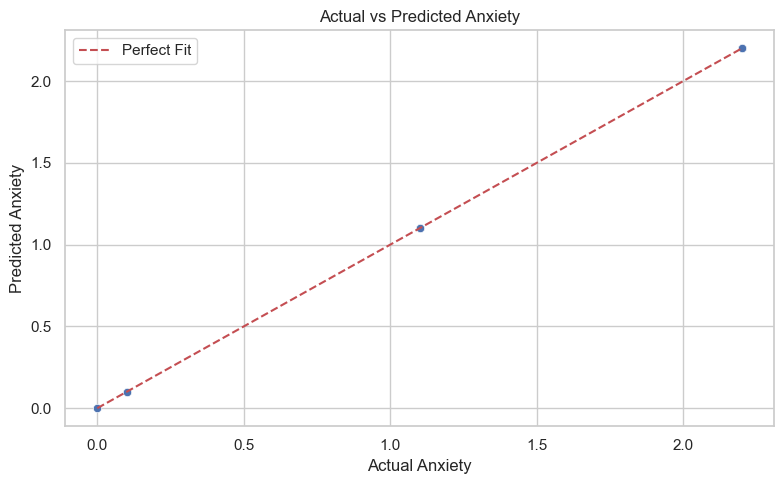

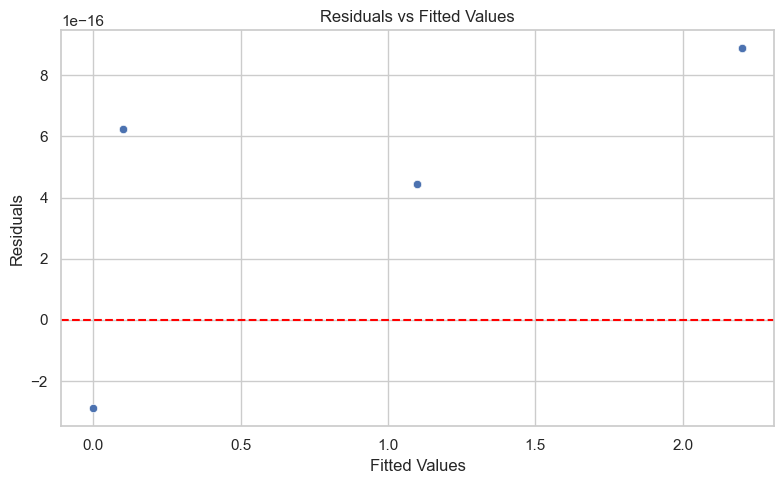

<Figure size 800x500 with 0 Axes>

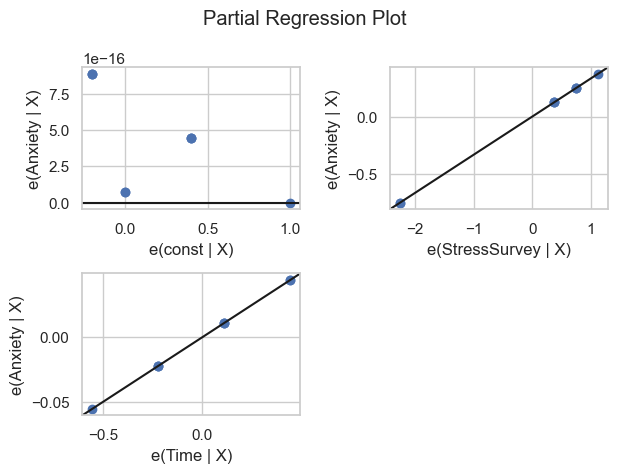

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X)
residuals = y - y_pred

# Set plot style
sns.set(style="whitegrid")

# 1. Actual vs Predicted Anxiety
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')
plt.xlabel("Actual Anxiety")
plt.ylabel("Predicted Anxiety")
plt.title("Actual vs Predicted Anxiety")
plt.legend()
plt.tight_layout()
plt.show()

# 2. Residuals vs Fitted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.tight_layout()
plt.show()

# 3. Partial regression plots (component + residual)
fig = sm.graphics.plot_partregress_grid(model)
fig.tight_layout(pad=1.0)
plt.show()
